In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# libraries for computation
import pandas as pd
import numpy as np

#library for train test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#library for preprocessing
from sklearn.preprocessing import StandardScaler

#library for Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#Library for feature selection techniques
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

#libraries for various ML models 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor



#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

In [6]:
def plotConfusion(cm):
    sns.set_style('white')
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
    classNames = ['Genuine','Imposter']
    plt.title('Confusion Matrix',fontsize = 15)
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames,fontsize=12)
    plt.yticks(tick_marks, classNames,fontsize=12)
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [7]:
data = pd.read_csv("RealData.csv")
data.head()

,UserName,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return,Target
0,Nikhil,0.119,0.272,0.153,0.103,0.208,0.105,0.103,0.288,0.185,...,0.328,0.225,0.135,0.264,0.129,0.111,0.311,0.200,0.112,Genuine
1,Nikhil,0.119,0.272,0.153,0.103,0.216,0.113,0.103,0.287,0.184,...,0.312,0.209,0.151,0.272,0.121,0.110,0.304,0.194,0.151,Genuine
2,Nikhil,0.127,0.352,0.225,0.143,0.240,0.097,0.143,0.344,0.201,...,0.297,0.154,0.150,0.263,0.113,0.127,0.304,0.177,0.127,Genuine
3,Nikhil,0.122,0.315,0.193,0.127,0.200,0.073,0.111,0.400,0.289,...,0.200,0.089,0.143,0.240,0.097,0.159,0.176,0.017,0.087,Genuine
4,Nikhil,0.143,0.232,0.089,0.119,0.208,0.089,0.127,0.264,0.137,...,0.184,0.041,0.151,0.224,0.073,0.206,0.192,-0.014,0.119,Genuine


In [8]:
data.columns

Index(['UserName', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i',
       'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five',
       'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r',
       'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a',
       'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return',
       'UD.l.Return', 'H.Return', 'Target'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 33 columns):
UserName           1615 non-null object
H.period           1615 non-null float64
DD.period.t        1615 non-null float64
UD.period.t        1615 non-null float64
H.t                1615 non-null float64
DD.t.i             1615 non-null float64
UD.t.i             1615 non-null float64
H.i                1615 non-null float64
DD.i.e             1615 non-null float64
UD.i.e             1615 non-null float64
H.e                1615 non-null float64
DD.e.five          1615 non-null float64
UD.e.five          1615 non-null float64
H.five             1615 non-null float64
DD.five.Shift.r    1615 non-null float64
UD.five.Shift.r    1615 non-null float64
H.Shift.r          1615 non-null float64
DD.Shift.r.o       1615 non-null float64
UD.Shift.r.o       1615 non-null float64
H.o                1615 non-null float64
DD.o.a             1615 non-null float64
UD.o.a             1615 non-null 

In [10]:
data['UserName'].value_counts()

Nikhil      709
Deepti      327
Huy         248
Shridhar     94
Vikram       38
Tarang       33
Vishu        33
Sushmit      25
Rohan        25
Abhishek     24
Tejas C      23
Tejas S      22
Rutvik       14
Name: UserName, dtype: int64

In [11]:
data['Target'].value_counts()

Imposter    906
Genuine     709
Name: Target, dtype: int64

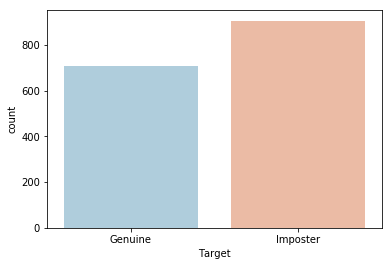

In [12]:
sns.countplot(x='Target',data=data,palette='RdBu_r')

In [13]:
features = list(data.columns[1:32])
X = data[features]
y = data['Target']
train, test = train_test_split(data, test_size = 0.2)
X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']

[[135   2]
 [  9 177]]


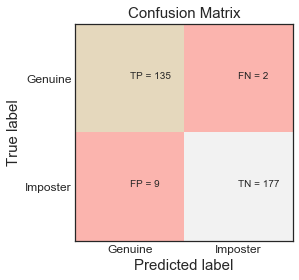

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)
plotConfusion(cm)

[0.9568432599392352, 0.9445732736901048, 0.9660174440499528, 0.9598933645700473, 0.9660418923346805, 0.9629670112510504, 0.9598387975135807, 0.9567654671877378, 0.956732608259872, 0.9598387975135807, 0.9659902518261582, 0.9659902518261582, 0.9690402476780186, 0.9659602947435181, 0.9690402476780186]


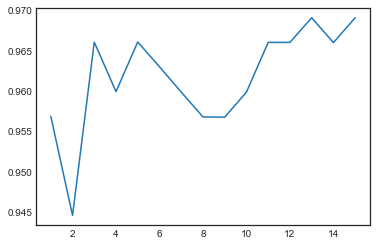

In [15]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
f1_scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(kVals,f1_scores)    
print(f1_scores) 

In [16]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9286832623124992
Accuracy Score:  0.9287925696594427


In [17]:
#DT
d_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
d_classifier.fit(X_train,y_train)
pred = d_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9876036820582441
Accuracy Score:  0.9876160990712074


In [18]:
#Ensemble Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9938080495356038
Accuracy Score:  0.9938080495356038


[1.0, 0.9969025045843413, 0.9907164440209595, 0.9938080495356038, 0.9938080495356038, 0.9938080495356038, 0.9938080495356038, 0.9938080495356038]


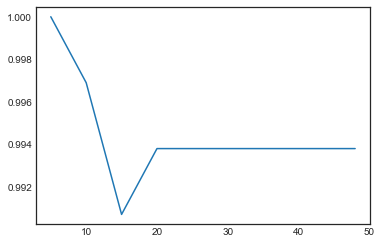

In [19]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,48]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [20]:
#Bagging Classifier with Decision tree as base learner
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=cart, n_estimators=150, random_state=7)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9845410235573446
Accuracy Score:  0.9845201238390093


In [21]:
#ExtraTreeClassifier
num_trees = 80
max_features = 30
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9876274982749609
Accuracy Score:  0.9876160990712074


In [22]:
# AdaBoostClassifier
seed = 7
num_trees = 100
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9938137491374804
Accuracy Score:  0.9938080495356038


In [23]:
seed = 7
num_trees = 100
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9907075137530237
Accuracy Score:  0.9907120743034056


F1 Score:  0.9845410235573446
Accuracy Score:  0.9845201238390093
[[136   1]
 [  4 182]]


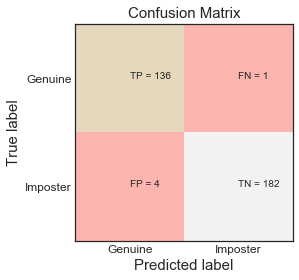

In [40]:
# Try with Different Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
# create the sub models
estimators = []
model1 = KNeighborsClassifier(n_neighbors=5)
estimators.append(('Knn', model1))
model2 = RandomForestClassifier(n_estimators=100, max_features=30)
estimators.append(('RandomForest', model2))
model3 = ExtraTreesClassifier(n_estimators=100, max_features=30)
estimators.append(('ExtraTree', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
pred = ensemble.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))
cm = confusion_matrix(y_test,pred)
print(cm)
plotConfusion(cm)

In [25]:
#MLPClassifier
net = net = MLPClassifier(random_state=2,hidden_layer_sizes=(100,200,330,10),max_iter=500,activation= 'relu', learning_rate= 'invscaling', solver='adam')
net.fit(X_train,y_train)
pred= net.predict(X_test)

print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9845274067015991
Accuracy Score:  0.9845201238390093


In [26]:
pca = PCA(n_components=15)  
X_train_pca = pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test) 

In [27]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca,y_train)
pred = knn.predict(X_test_pca)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9629670112510504
Accuracy Score:  0.9628482972136223


[0.9537490459079098, 0.9476455768432261, 0.9660174440499528, 0.9568207699922403, 0.9629670112510504, 0.9598933645700473, 0.9598387975135807, 0.9567654671877378, 0.956732608259872, 0.9598387975135807, 0.9659902518261582, 0.9659902518261582, 0.9690402476780186, 0.9628824948248826, 0.9690402476780186]


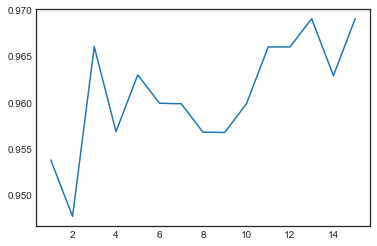

In [28]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
f1_scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca,y_train)
    pred = knn.predict(X_test_pca)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(kVals,f1_scores)    
print(f1_scores) 

In [29]:
#Ensemble Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=150, random_state = 42)
rf_classifier.fit(X_train_pca,y_train)
pred = rf_classifier.predict(X_test_pca)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9782949059211954
Accuracy Score:  0.978328173374613


In [30]:
#ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, max_features=5)
model.fit(X_train_pca, y_train)
pred = model.predict(X_test_pca)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9845274067015991
Accuracy Score:  0.9845201238390093


In [31]:
pca = PCA(n_components=5)  
X_train_pca = pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test) 
#Version 13 imporvement
# Try with Different Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
# create the sub models
estimators = []
model1 = KNeighborsClassifier(n_neighbors=4)
estimators.append(('Knn', model1))
model2 = RandomForestClassifier(n_estimators=100, max_features=5)
estimators.append(('RandomForest', model2))
model3 = ExtraTreesClassifier(n_estimators=100, max_features=5)
estimators.append(('ExtraTree', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train_pca, y_train)
pred = ensemble.predict(X_test_pca)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.947439480094972
Accuracy Score:  0.9473684210526315


In [32]:
svd = TruncatedSVD(n_components=25)
X_train_svd = svd.fit_transform(X_train,y_train)
X_test_svd = svd.transform(X_test)

In [33]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_svd,y_train)
pred = knn.predict(X_test_svd)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9660418923346805
Accuracy Score:  0.9659442724458205


[0.9568432599392352, 0.9445732736901048, 0.9660174440499528, 0.9598933645700473, 0.9660418923346805, 0.9629670112510504, 0.9598387975135807, 0.9567654671877378, 0.956732608259872, 0.9598387975135807, 0.9659902518261582, 0.9659902518261582, 0.9690402476780186, 0.9659602947435181, 0.9690402476780186]


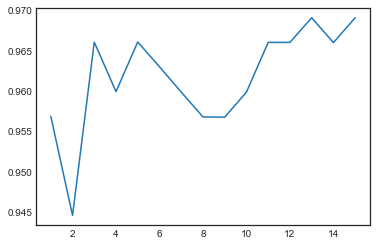

In [34]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
f1_scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_svd,y_train)
    pred = knn.predict(X_test_svd)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(kVals,f1_scores)    
print(f1_scores)

In [35]:
#Ensemble Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=150, random_state = 42)
rf_classifier.fit(X_train_svd,y_train)
pred = rf_classifier.predict(X_test_svd)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9782442213617549
Accuracy Score:  0.978328173374613


In [36]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=50, max_features=20,random_state=7)
model.fit(X_train_svd, y_train)
pred = model.predict(X_test_svd)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9719921641607405
Accuracy Score:  0.9721362229102167


In [37]:
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=10,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X, y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])

Optimal number of features : 30
Best features : Index(['H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i',
       'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'UD.e.five', 'H.five',
       'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o',
       'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n',
       'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return',
       'H.Return'],
      dtype='object')


In [38]:
st  = "0.122,0.267,0.145,0.143,0.2,0.057,0.135,0.36,0.225,0.15,1.6,1.45,0.231,0.8,0.569,0.335,0.224,-0.111,0.167,0.247,0.08,0.127,0.232,0.105,0.168,0.312,0.144,0.28,0.2,-0.08,0.128"
li = list(st.split(','))


In [39]:
ar = np.array(li)
arr = ar.reshape(1,31)

In [129]:
arr.shape

(1, 31)

In [131]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
res = knn.predict(arr)

In [133]:
res[0]

'Genuine'